# Basic Dataset Overview

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('../data/processed/qm9_mordred_clean.csv')

In [22]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# --- 1. Dataset Overview ---
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes.value_counts())
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False).head(10))
print("\nBasic stats:")
display(df.describe())

Dataset Shape: (128757, 36)

Data Types:
float64    23
int64      12
object      1
Name: count, dtype: int64

Missing values per column:
smiles      0
mu          0
nHetero     0
GATS1c      0
GATS2c      0
nBonds      0
nBondsO     0
nBondsS     0
nBondsM     0
nBondsKD    0
dtype: int64

Basic stats:


,mu,HOMO,LUMO,alpha,gap,RadiusOfGyration,Asphericity,Eccentricity,PMI1,PMI2,...,nBondsM,nBondsKD,C1SP1,C2SP1,C1SP2,C2SP2,C1SP3,C2SP3,HybRatio,FCSP3
count,128757.000000,128757.000000,128757.000000,128757.000000,128757.000000,128757.000000,128757.000000,128757.000000,1.287570e+05,128757.000000,...,128757.000000,128757.000000,128757.000000,128757.000000,128757.000000,128757.000000,128757.000000,128757.000000,128757.000000,128757.000000
mean,2.681969,-0.240380,0.011794,75.277929,0.252174,1.968345,0.333208,0.925018,1.344453e+02,341.082160,...,1.928447,1.061255,0.243412,0.189955,0.546339,0.547962,1.411807,1.883758,0.744018,0.691975
std,1.506153,0.021974,0.046828,8.188153,0.047062,0.224401,0.168311,0.061573,4.097083e+01,120.382705,...,2.104009,1.008537,0.478759,0.537021,0.783356,0.914445,1.094262,1.430424,0.281927,0.276025
min,0.000000,-0.428600,-0.175000,13.210000,0.024600,0.000000,0.000000,0.000000,-3.289165e-16,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.584700,-0.252800,-0.023200,70.459999,0.217100,1.823747,0.206356,0.896568,1.056483e+02,259.262265,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.600000,0.500000
50%,2.485900,-0.241300,0.012700,75.610001,0.250300,1.942305,0.309442,0.940772,1.333897e+02,315.883733,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.833333,0.750000
75%,3.604800,-0.229200,0.050500,80.620003,0.289400,2.080096,0.440719,0.969591,1.614037e+02,394.779666,...,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000,1.000000,0.857143
max,29.556400,-0.101700,0.193500,196.619995,0.622100,3.418685,1.000000,1.000000,3.258132e+02,1286.724957,...,10.000000,4.000000,4.000000,7.000000,6.000000,8.000000,6.000000,9.000000,1.000000,1.000000


#### Visualization of Molecular Properties (First 200 Molecules)

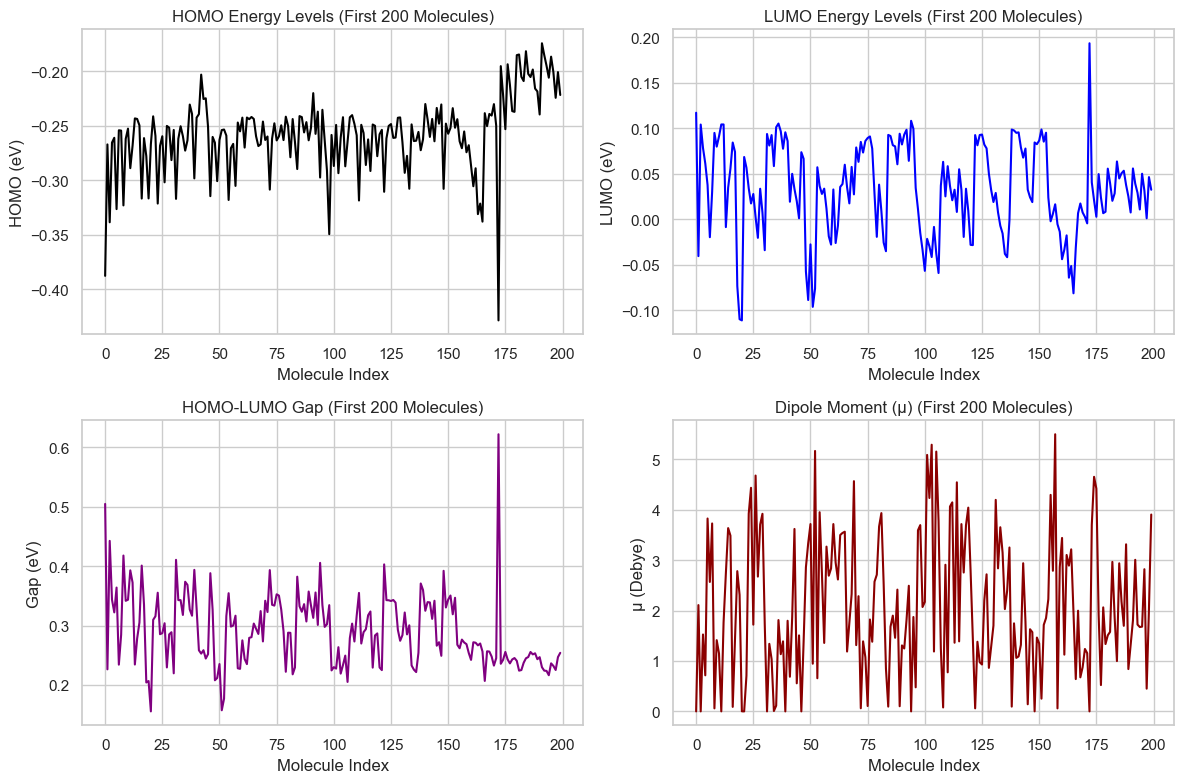

Plot saved to: ../results/plots\molecular_properties_overview.png


In [44]:
import os
import matplotlib.pyplot as plt


# Ensure plot directory exists
plot_dir = "../results/plots"
os.makedirs(plot_dir, exist_ok=True)

# Subset first 200 molecules
df_subset = df.iloc[:200]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# HOMO plot
axes[0, 0].plot(df_subset['HOMO'], color="black")
axes[0, 0].set_title("HOMO Energy Levels (First 200 Molecules)")
axes[0, 0].set_xlabel("Molecule Index")
axes[0, 0].set_ylabel("HOMO (eV)")

# LUMO plot
axes[0, 1].plot(df_subset['LUMO'], color="blue", linestyle="-")
axes[0, 1].set_title("LUMO Energy Levels (First 200 Molecules)")
axes[0, 1].set_xlabel("Molecule Index")
axes[0, 1].set_ylabel("LUMO (eV)")

# GAP plot (replaces Molecular Weight)
axes[1, 0].plot(df_subset['gap'], color="purple")
axes[1, 0].set_title("HOMO-LUMO Gap (First 200 Molecules)")
axes[1, 0].set_xlabel("Molecule Index")
axes[1, 0].set_ylabel("Gap (eV)")

# Dipole Moment (μ)
axes[1, 1].plot(df_subset['mu'], color="darkred")
axes[1, 1].set_title("Dipole Moment (μ) (First 200 Molecules)")
axes[1, 1].set_xlabel("Molecule Index")
axes[1, 1].set_ylabel("μ (Debye)")

# Save plot
plot_path = os.path.join(plot_dir, "molecular_properties_overview.png")
plt.tight_layout()
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Plot saved to: {plot_path}")


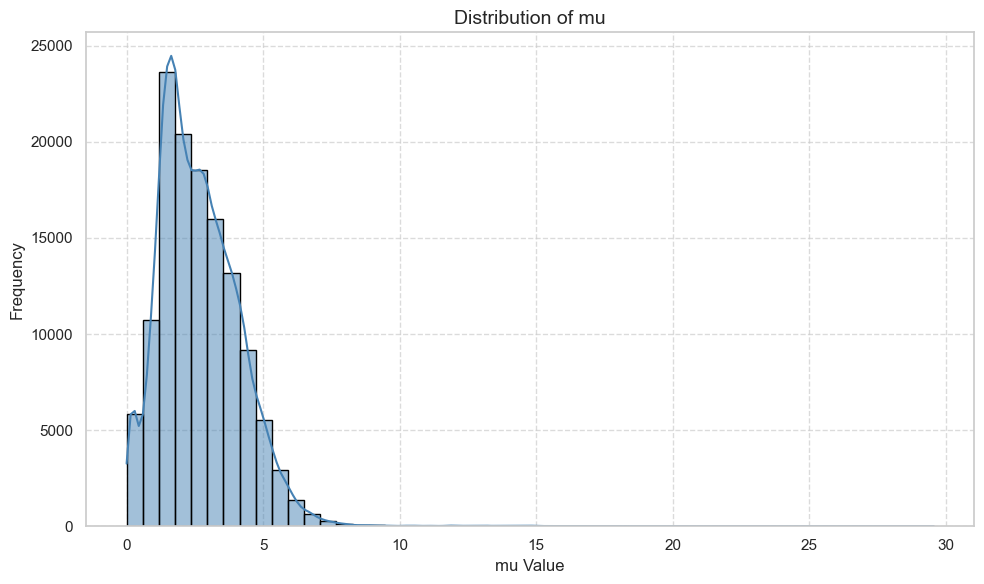

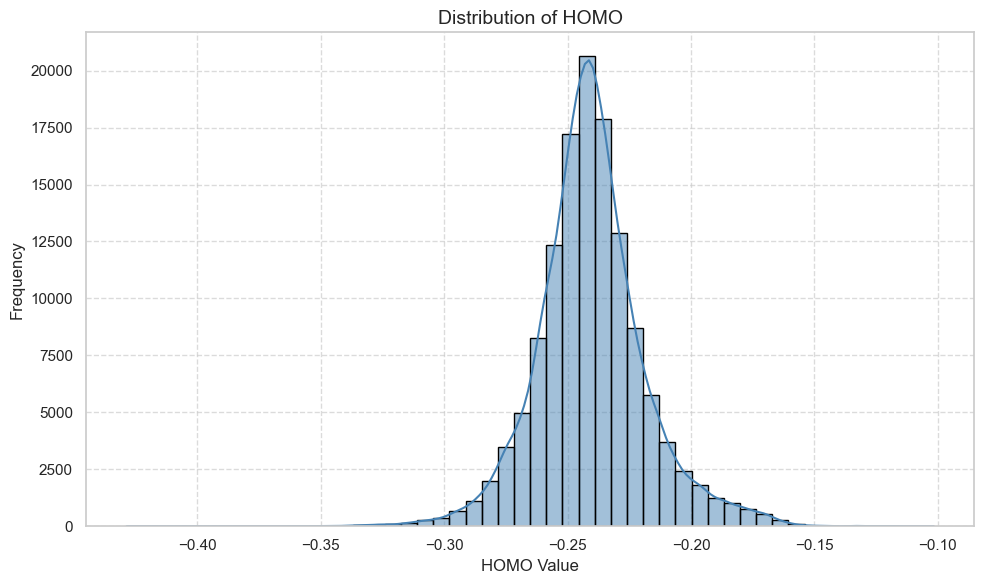

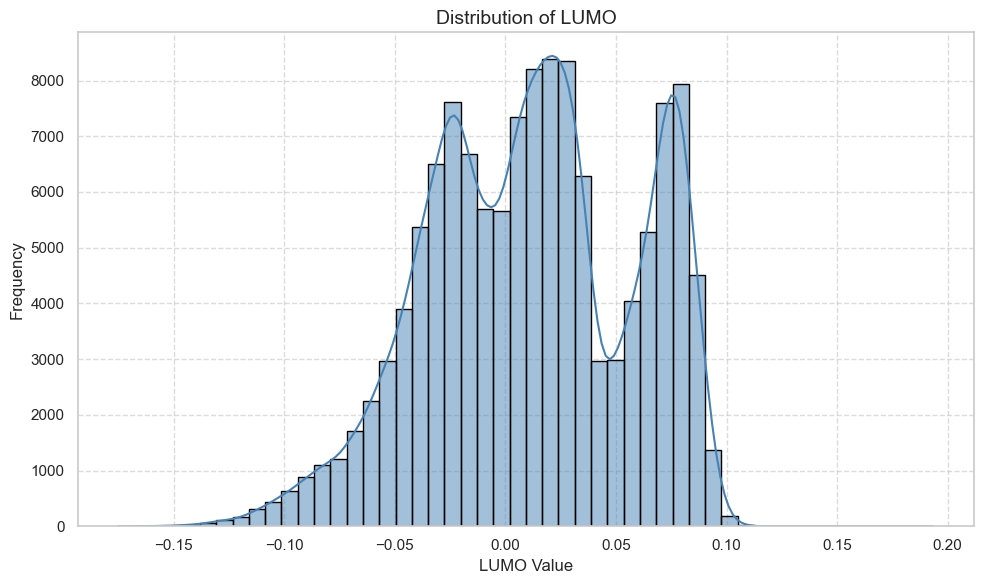

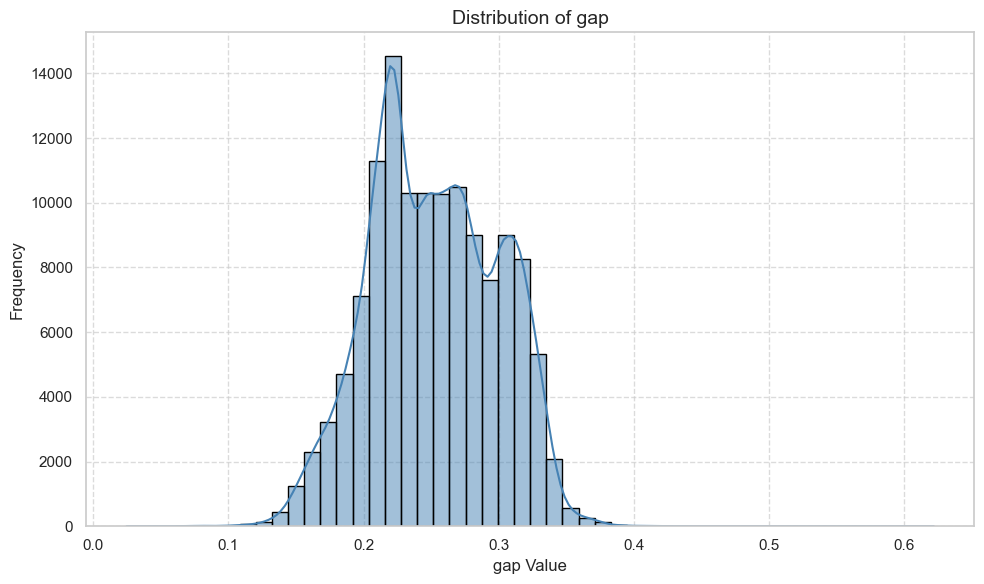

In [31]:
output_dir = "../results/plots"

# --- 2. Target Variable Analysis ---
# Define targets
targets = ["mu", "HOMO", "LUMO", "gap"]


# Histograms + KDE for targets
for col in targets:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=50, color="steelblue", edgecolor="black")
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(f"{col} Value", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/hist_{col}.png", dpi=300)
    plt.show()
    plt.close()

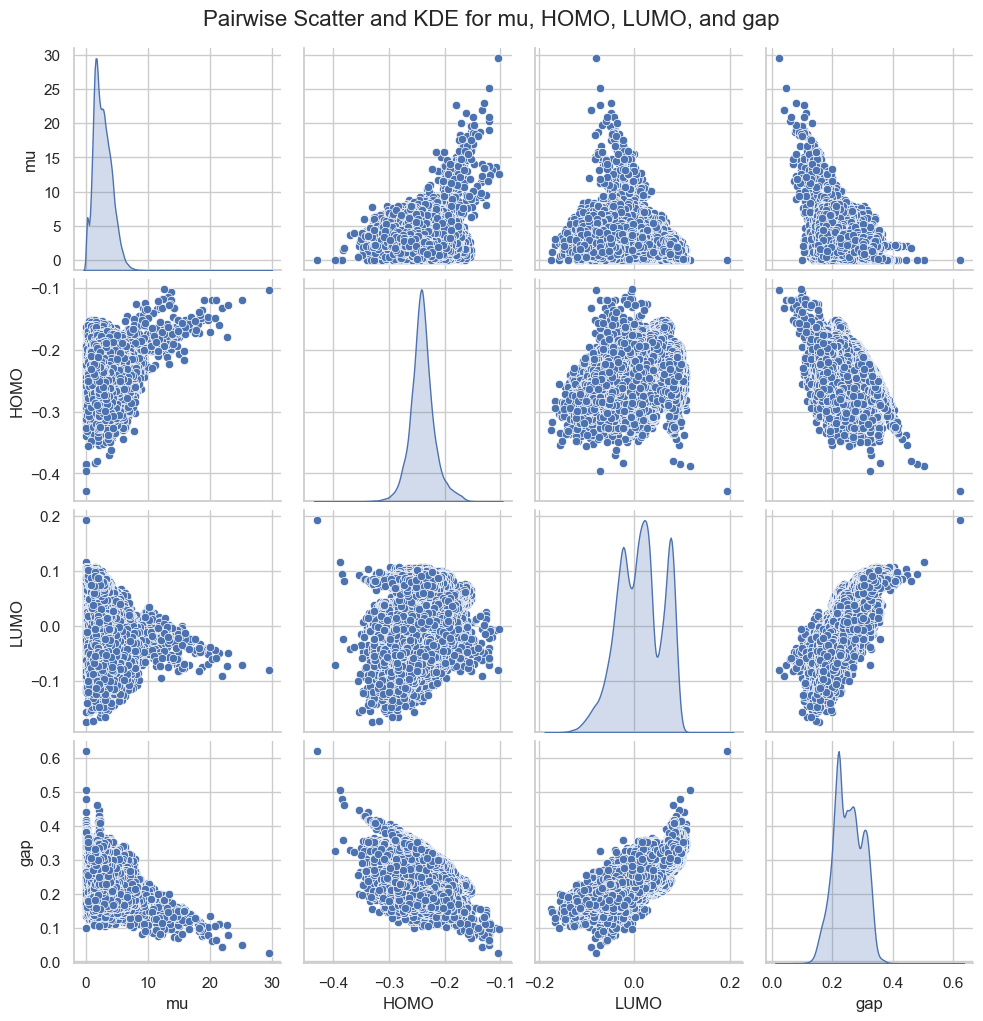

In [32]:
# Pairplot of targets 
pairplot_fig = sns.pairplot(df[targets], kind="scatter", diag_kind="kde")
pairplot_fig.fig.suptitle("Pairwise Scatter and KDE for mu, HOMO, LUMO, and gap", y=1.02, fontsize=16)
pairplot_fig.savefig(f"{output_dir}/pairplot_targets_gap.png", dpi=300)
plt.show()
plt.close()

C:\Users\tkasiror\AppData\Local\Temp\ipykernel_34284\3761264942.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations[top_corr_features], y=top_corr_features, palette="viridis")


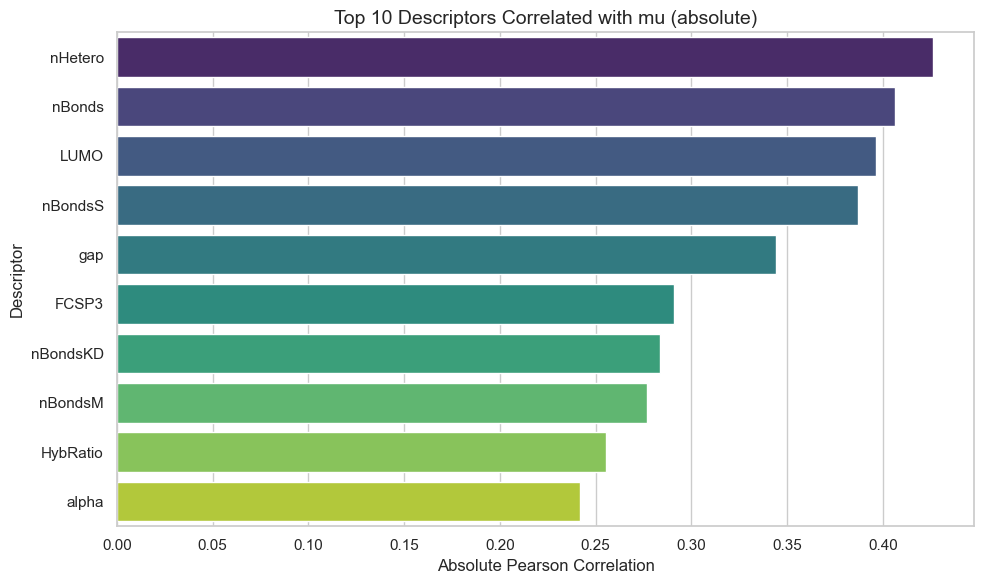

In [33]:
# --- 3. Descriptor Correlation Summary ---
# Calculate correlations with mu
correlations = df.corr(numeric_only=True)["mu"].abs().sort_values(ascending=False)
top_corr_features = correlations.index[1:11]  # exclude mu itself

plt.figure()
sns.barplot(x=correlations[top_corr_features], y=top_corr_features, palette="viridis")
plt.title("Top 10 Descriptors Correlated with mu (absolute)", fontsize=14)
plt.xlabel("Absolute Pearson Correlation", fontsize=12)
plt.ylabel("Descriptor", fontsize=12)
plt.tight_layout()
plt.savefig(f"{output_dir}/top10_mu_correlation.png", dpi=300)
plt.show()
plt.close()

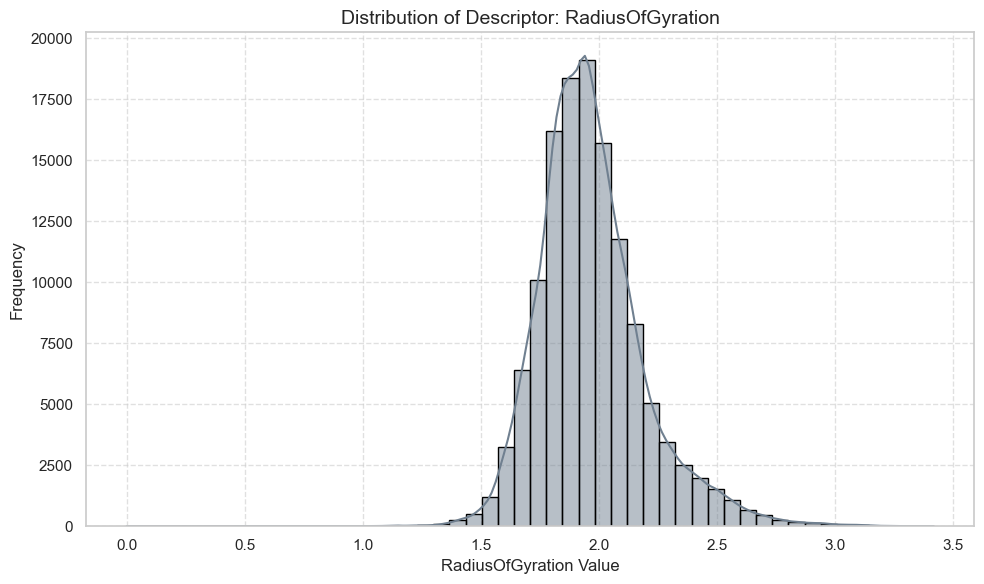

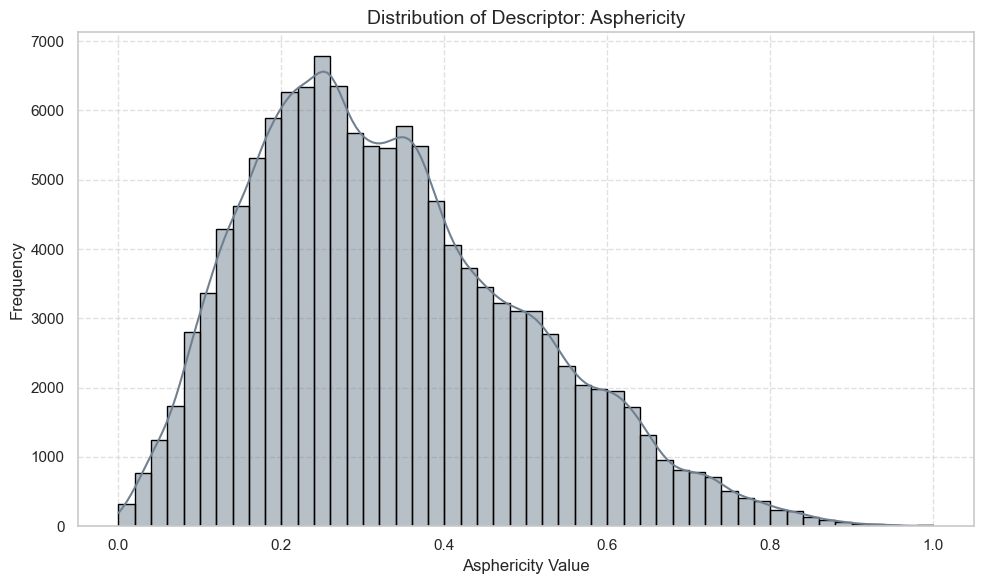

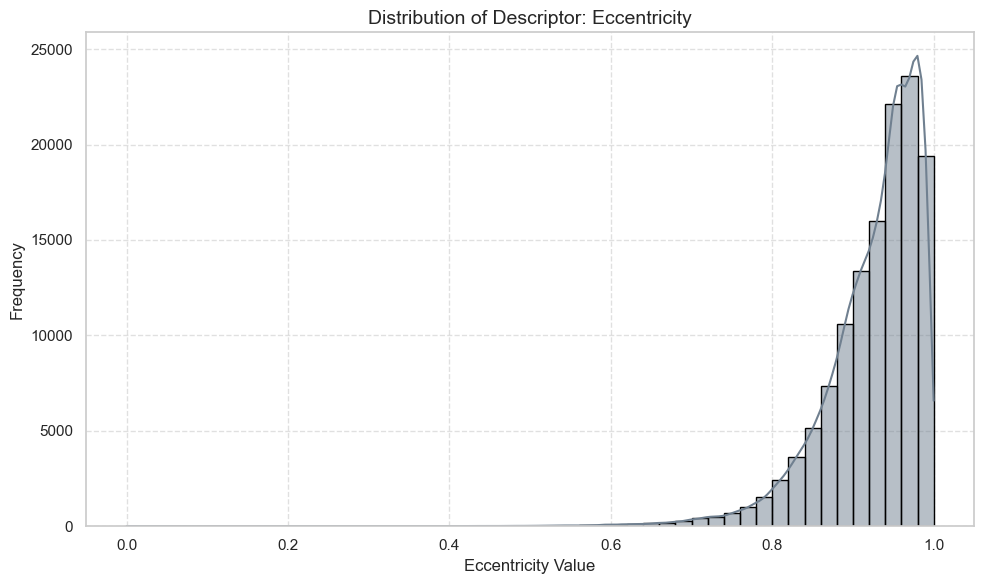

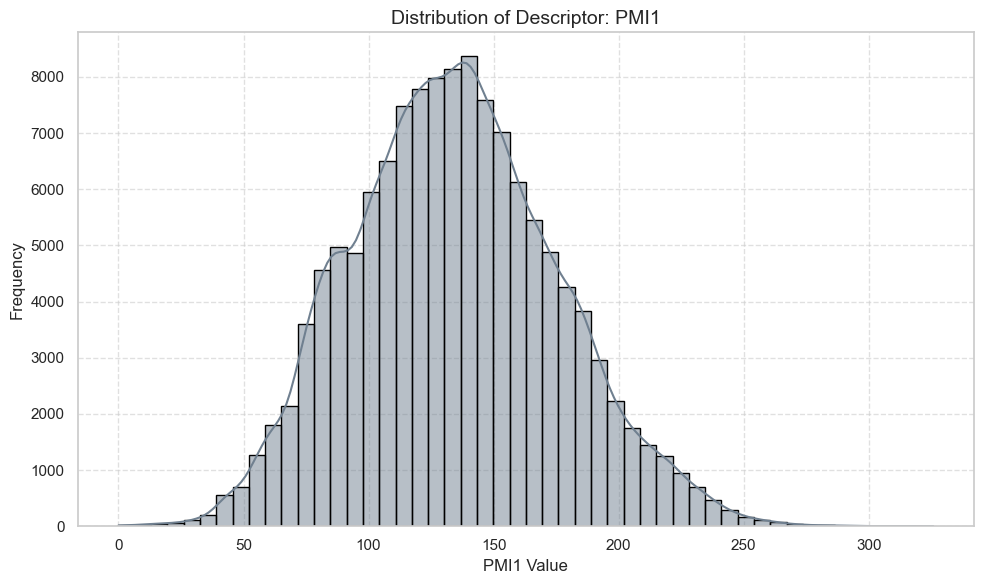

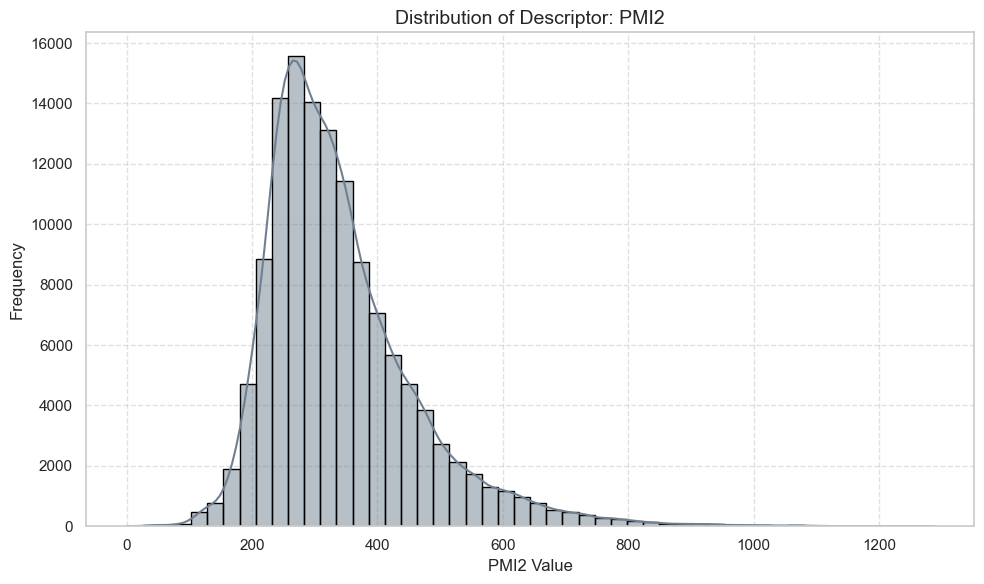

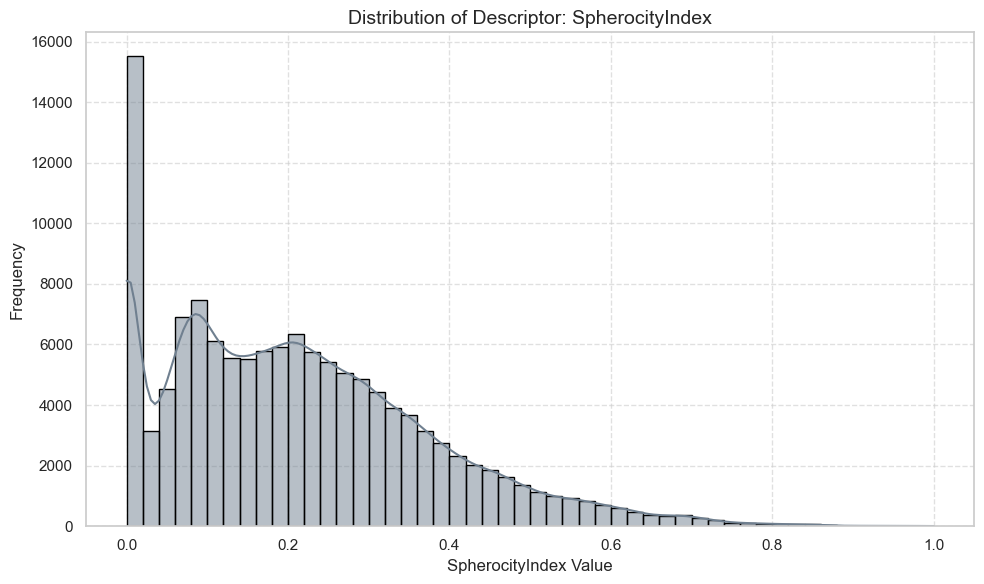

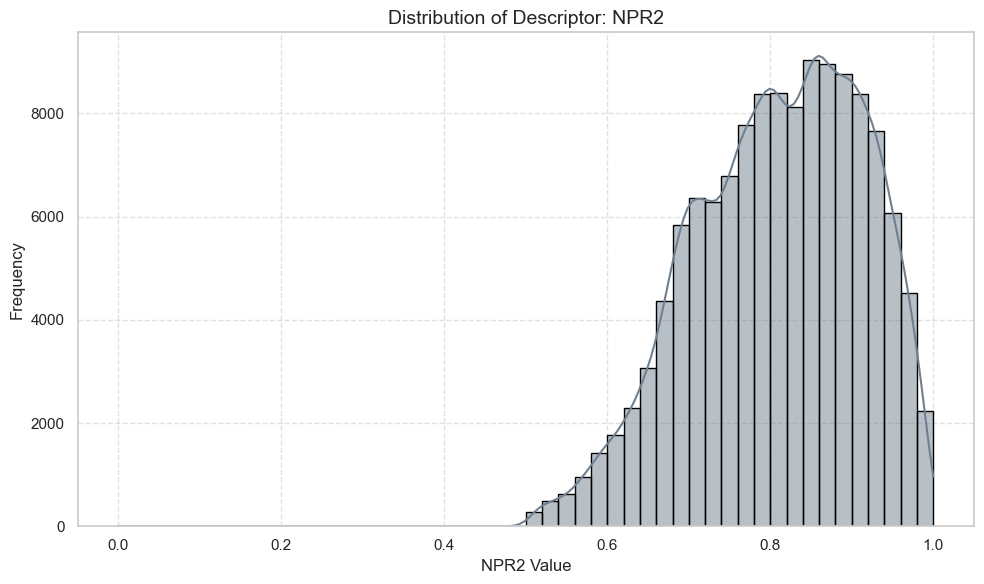

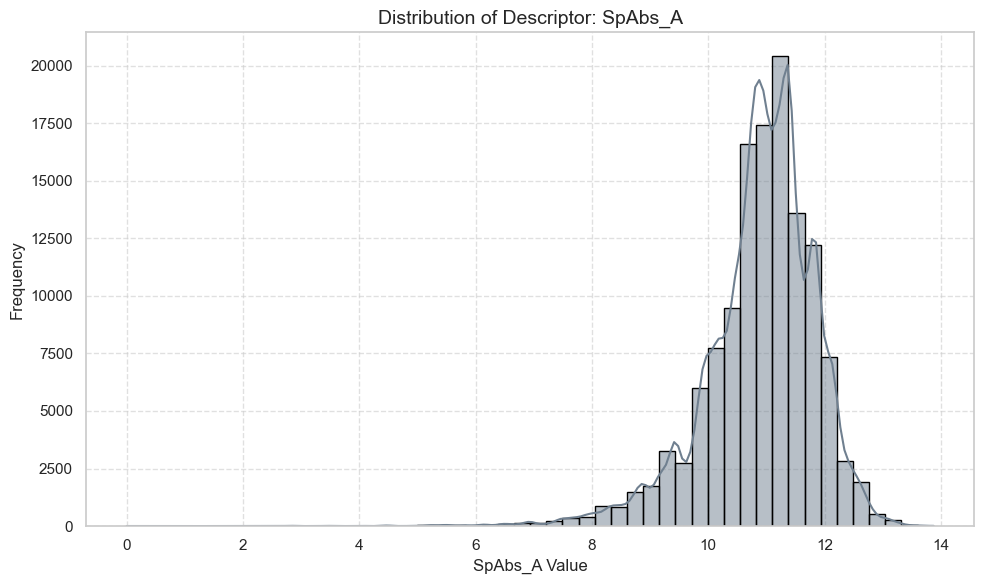

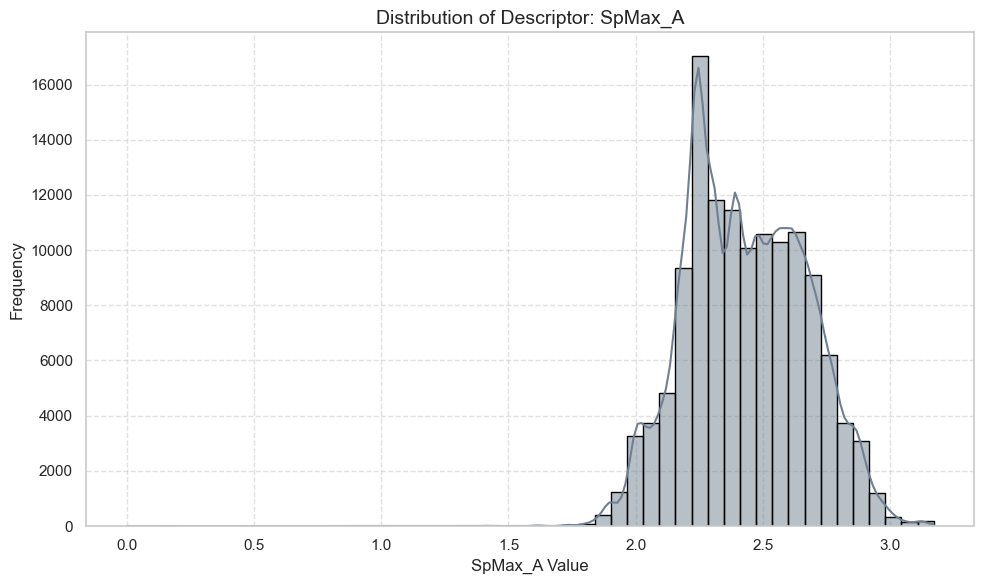

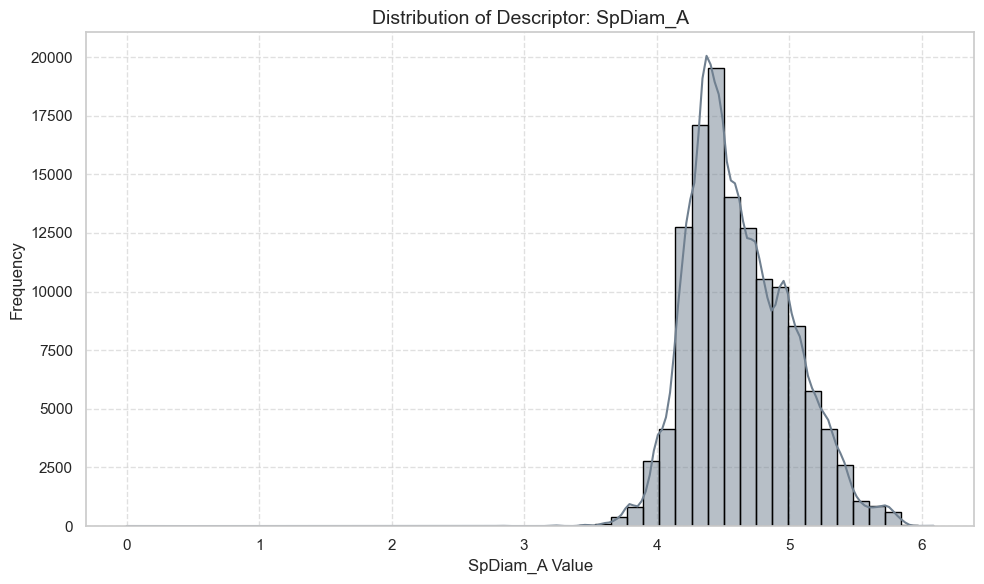

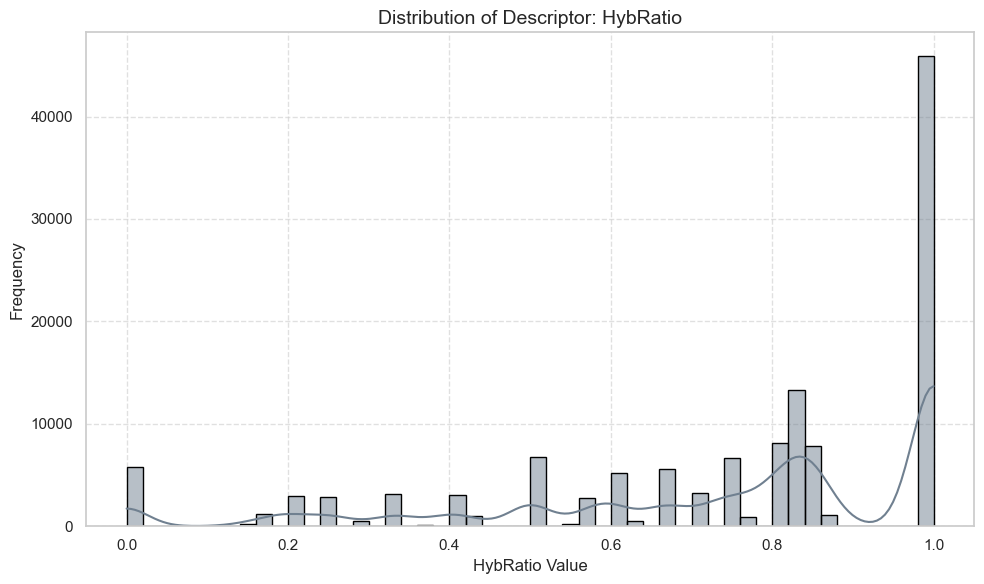

In [34]:
# --- 4. Descriptor Distribution Checks ---
# Pick some example descriptors
example_descriptors = [
    'RadiusOfGyration', 'Asphericity', 'Eccentricity', 'PMI1', 'PMI2',
    'SpherocityIndex', 'NPR2', 'SpAbs_A', 'SpMax_A', 'SpDiam_A', 'HybRatio'
]

for desc in example_descriptors:
    plt.figure()
    sns.histplot(df[desc], kde=True, bins=50, color="slategray", edgecolor="black")
    plt.title(f"Distribution of Descriptor: {desc}", fontsize=14)
    plt.xlabel(f"{desc} Value", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/descriptor_distribution_{desc}.png", dpi=300)
    plt.show()
    plt.close()



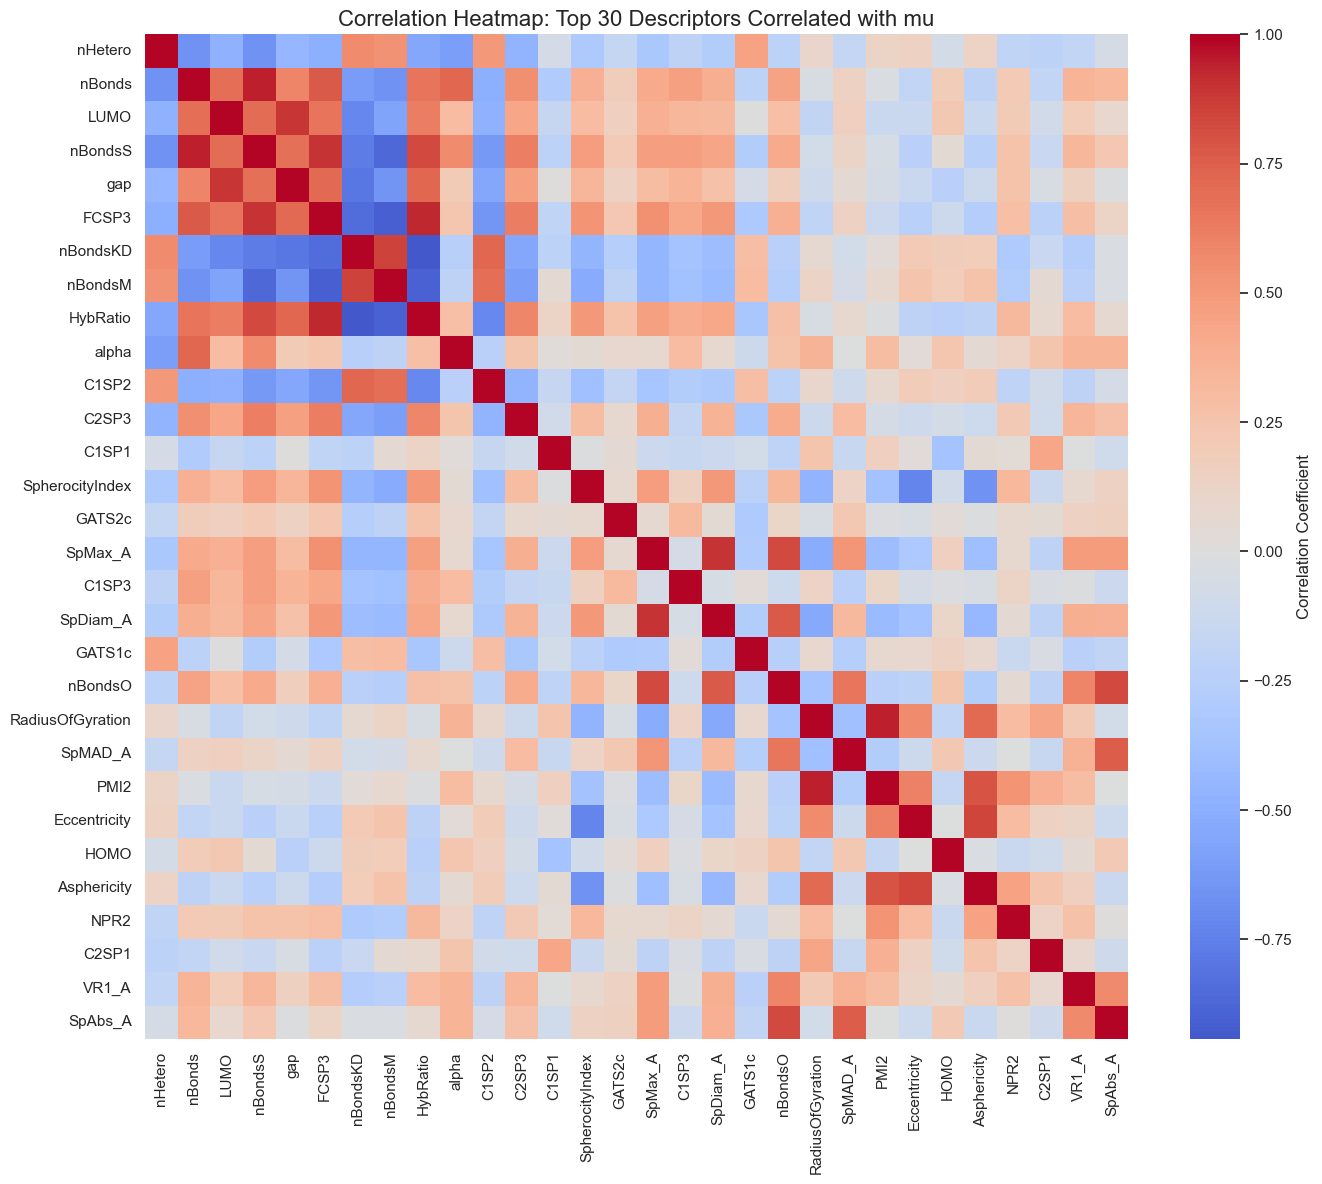

In [35]:
# --- 5. Feature Correlation Heatmap ---
# Take top 30 descriptors most correlated with mu
top_30 = correlations.index[1:31]
corr_matrix = df[top_30].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap: Top 30 Descriptors Correlated with mu", fontsize=16)
plt.tight_layout()
plt.savefig(f"{output_dir}/heatmap_top30_mu_corr.png", dpi=300)
plt.show()
plt.close()

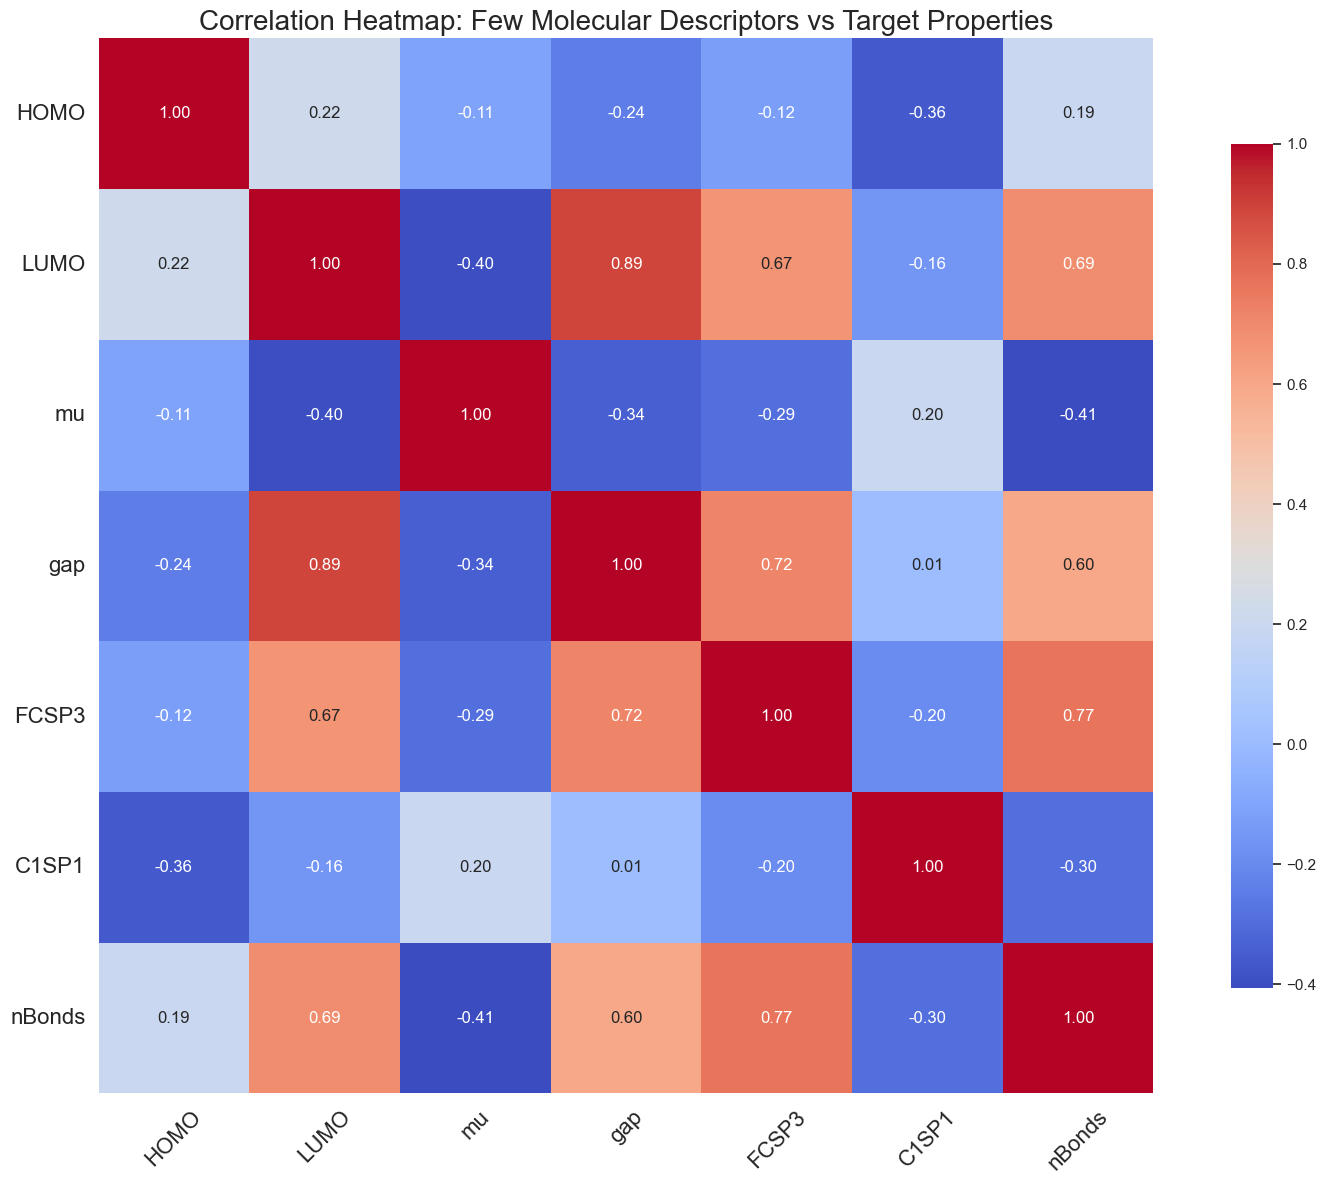

Heatmap saved to: ../results/plots\correlation_heatmap.png


In [49]:
plot_dir = "../results/plots"
os.makedirs(plot_dir, exist_ok=True)

# Select relevant columns and drop missing values
columns_to_plot = ['HOMO', 'LUMO', 'mu', 'gap', 'FCSP3', 'C1SP1', 'nBonds']
df_sub = df[columns_to_plot].dropna()

# Compute correlation matrix
corr = df_sub.corr()

# Create the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    cbar_kws={'shrink': 0.8}
)

# Title and label formatting
plt.title("Correlation Heatmap: Few Molecular Descriptors vs Target Properties", fontsize=20)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16, rotation=0)
plt.tight_layout()

# Save figure
plot_path = os.path.join(plot_dir, "correlation_heatmap.png")
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Heatmap saved to: {plot_path}")


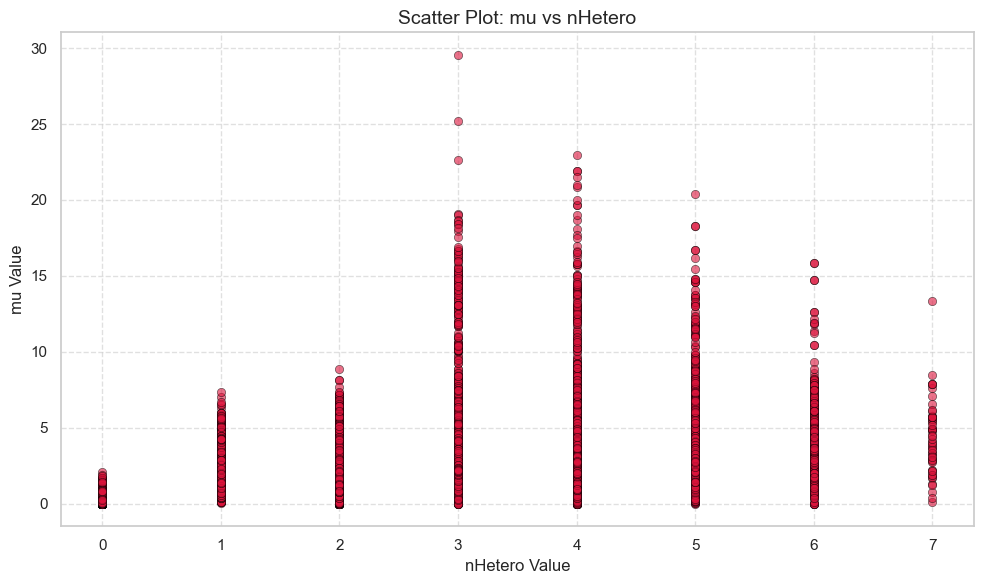

In [36]:
# --- 6. Outlier Check (Scatter mu vs top correlated feature) ---
top_feature = top_corr_features[0]

plt.figure()
sns.scatterplot(x=df[top_feature], y=df["mu"], alpha=0.6, color="crimson", edgecolor="black")
plt.title(f"Scatter Plot: mu vs {top_feature}", fontsize=14)
plt.xlabel(f"{top_feature} Value", fontsize=12)
plt.ylabel("mu Value", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig(f"{output_dir}/scatter_mu_vs_{top_feature}.png", dpi=300)
plt.show()
plt.close()

Plot saved to ../results/plots/r2_comparison.png


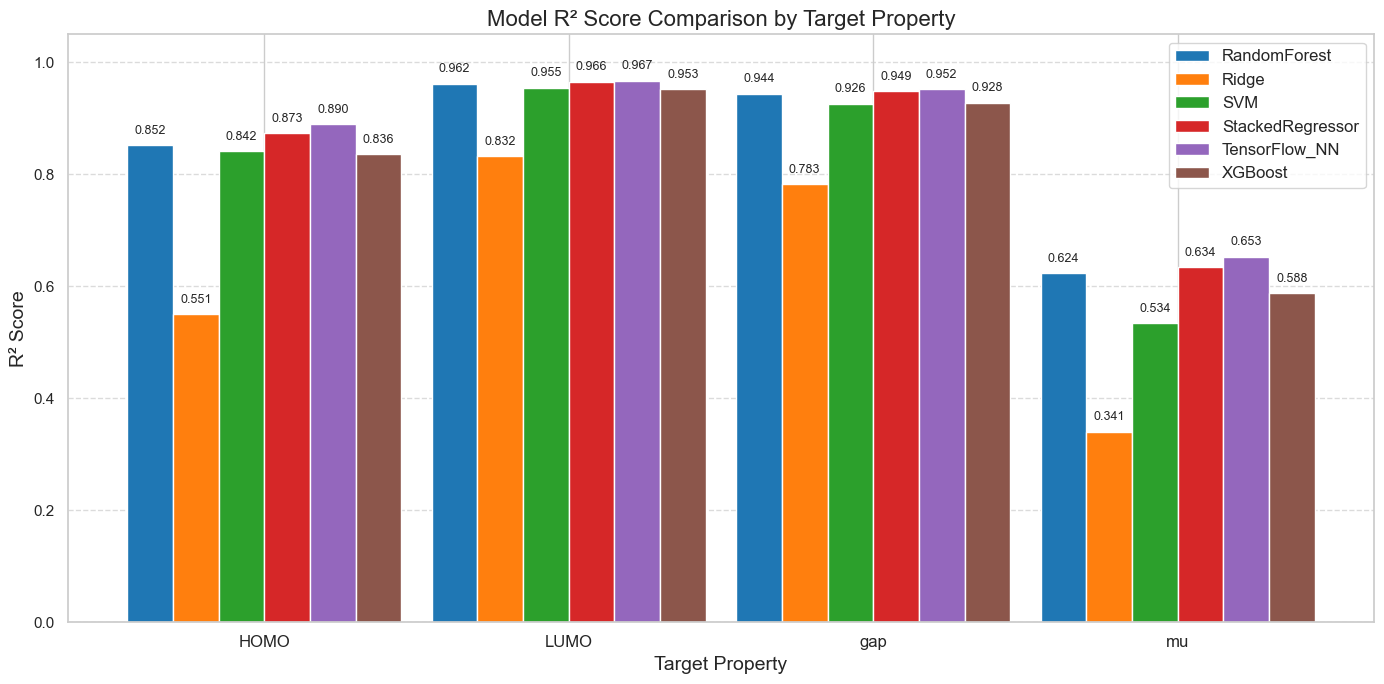

In [41]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

metrics_dir = "../results/metrics/"
plots_dir = "../results/plots/"
os.makedirs(plots_dir, exist_ok=True)

# Read all csvs and combine
all_dfs = []
for f in os.listdir(metrics_dir):
    if f.endswith(".csv"):
        df = pd.read_csv(os.path.join(metrics_dir, f))
        df.columns = [col.lower() for col in df.columns]  # lowercase columns
        # unify column names
        if 'r2_score' not in df.columns and 'r2' in df.columns:
            df.rename(columns={'r2': 'r2_score'}, inplace=True)
        all_dfs.append(df)
metrics_df = pd.concat(all_dfs, ignore_index=True)

# Get sorted unique targets and models
targets = sorted(metrics_df['target'].unique())
models = sorted(metrics_df['model'].unique())

# Prepare R2 data dict: model -> list of r2 values ordered by targets
r2_dict = {model: [] for model in models}
for model in models:
    for target in targets:
        val = metrics_df.loc[(metrics_df['model'] == model) & (metrics_df['target'] == target), 'r2_score']
        if not val.empty:
            r2_dict[model].append(val.values[0])
        else:
            r2_dict[model].append(np.nan)  # missing data

# Plot setup
bar_width = 0.15
gap_width = 0.1  # gap between property groups

n_models = len(models)
n_targets = len(targets)

# Compute x positions with gaps between target groups
x_positions = []
current_pos = 0
for _ in targets:
    # Positions for this target's group (models)
    for _ in models:
        x_positions.append(current_pos)
        current_pos += bar_width
    current_pos += gap_width  # extra gap after each target group

x_positions = np.array(x_positions)

# Flatten r2 values per model per target to match x_positions order
r2_values = []
for target_idx in range(n_targets):
    for model_idx in range(n_models):
        model = models[model_idx]
        r2_values.append(r2_dict[model][target_idx])

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Colors for models
colors = plt.get_cmap('tab10').colors

# Plot bars per model per target
for model_idx, model in enumerate(models):
    # Bars for this model are at positions x_positions starting at model_idx for every target group
    # Actually we already linearized x_positions for all bars; we will just plot bars one by one
    bar_xs = []
    bar_heights = []
    for target_idx in range(n_targets):
        idx = target_idx * (n_models) + model_idx  # index in flattened array
        bar_xs.append(x_positions[idx])
        bar_heights.append(r2_dict[model][target_idx])
    ax.bar(bar_xs, bar_heights, width=bar_width, color=colors[model_idx], label=model)

# Set x ticks at the center of each target group
tick_positions = []
for target_idx in range(n_targets):
    start = target_idx * (n_models * bar_width + gap_width)
    center = start + (n_models * bar_width) / 2 - bar_width / 2
    tick_positions.append(center)
ax.set_xticks(tick_positions)
ax.set_xticklabels(targets, fontsize=12)

# Labels and title
ax.set_xlabel('Target Property', fontsize=14)
ax.set_ylabel('R² Score', fontsize=14)
ax.set_title('Model R² Score Comparison by Target Property', fontsize=16)
ax.set_ylim(0, 1.05)

# Grid and legend
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(fontsize=12)

# Annotate bars
for model_idx, model in enumerate(models):
    for target_idx in range(n_targets):
        idx = target_idx * n_models + model_idx
        x_pos = x_positions[idx]
        height = r2_dict[model][target_idx]
        if not np.isnan(height):
            ax.text(x_pos, height + 0.02, f"{height:.3f}", ha='center', fontsize=9)

plt.tight_layout()

save_path = os.path.join(plots_dir, "r2_comparison.png")
plt.savefig(save_path)
print(f"Plot saved to {save_path}")

plt.show()


### Investigating the correlation of other qm features from the original qm9 dataset with mu

In [50]:
df_orig = pd.read_csv('../data/processed/qm9_full.csv')

In [52]:
df_orig.columns

Index(['A', 'B', 'C', 'Cv', 'G', 'G_atomization', 'H', 'H_atomization',
       'smiles', 'U', 'U0', 'U0_atomization', 'U_atomization', 'alpha', 'gap',
       'homo', 'index', 'lumo', 'mu', 'num_atoms', 'r2', 'zpve'],
      dtype='object')

In [54]:
def plot_qm9_heatmap(df, title="QM9 Property Correlation Heatmap"):
    """
    Construct and display a heatmap of the Pearson correlation matrix
    for the numeric columns of the QM9 dataset.
    
    Parameters:
        df (pd.DataFrame): QM9 dataset.
        title (str): Plot title.
        save_path (str): Optional path to save the heatmap image.
    """
    # Drop non-numeric or irrelevant columns
    df_numeric = df.select_dtypes(include=[float, int]).drop(columns=["index"], errors="ignore")

    # Compute correlation matrix
    corr = df_numeric.corr()

    # Plot heatmap
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'shrink': .75})
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()


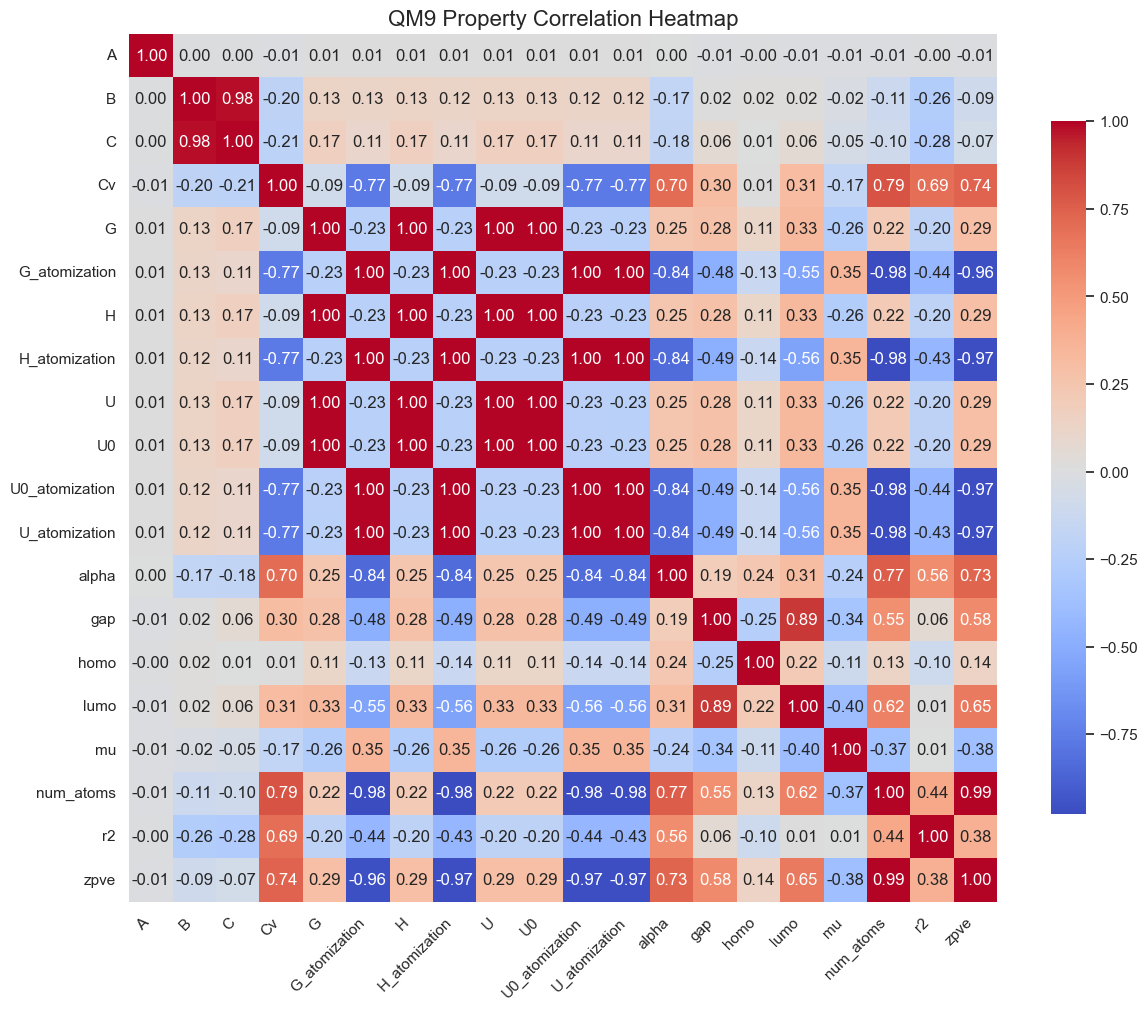

In [55]:
plot_qm9_heatmap(df_orig)

In [57]:
df_merged = pd.merge(df, df_orig, on="smiles", how="inner")


In [62]:
def plot_qm9_heatmap(df, title="QM9 Property Correlation Heatmap", max_columns=70):
    """
    Display a correlation heatmap for numeric columns in the QM9 dataset.
    Numbers (correlation coefficients) are shown on the heatmap, scaled to support wide DataFrames.

    Parameters:
        df (pd.DataFrame): The dataset.
        title (str): Title for the plot.
        max_columns (int): Limit to top N numeric features to avoid overcrowding.
        save_path (str): Optional path to save the plot image.
    """
    # Filter to numeric features only, remove 'index' if present
    df_numeric = df.select_dtypes(include=[float, int]).drop(columns=["index"], errors="ignore")

    # Truncate to avoid overcrowded plot if too many columns
    if df_numeric.shape[1] > max_columns:
        print(f"Too many columns ({df_numeric.shape[1]}). Truncating to first {max_columns} columns.")
        df_numeric = df_numeric.iloc[:, :max_columns]

    # Compute correlation matrix
    corr = df_numeric.corr()

    # Adjust figure size dynamically
    size = max(10, int(df_numeric.shape[1] * 0.6))  # scale with number of columns
    plt.figure(figsize=(size, size))

    # Plot heatmap with annotations
    sns.heatmap(
        corr,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        square=True,
        cbar_kws={'shrink': 0.75},
        annot_kws={"size": 6}
    )

    # Final layout adjustments
    plt.title(title, fontsize=16)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    plt.tight_layout()


    plt.show()


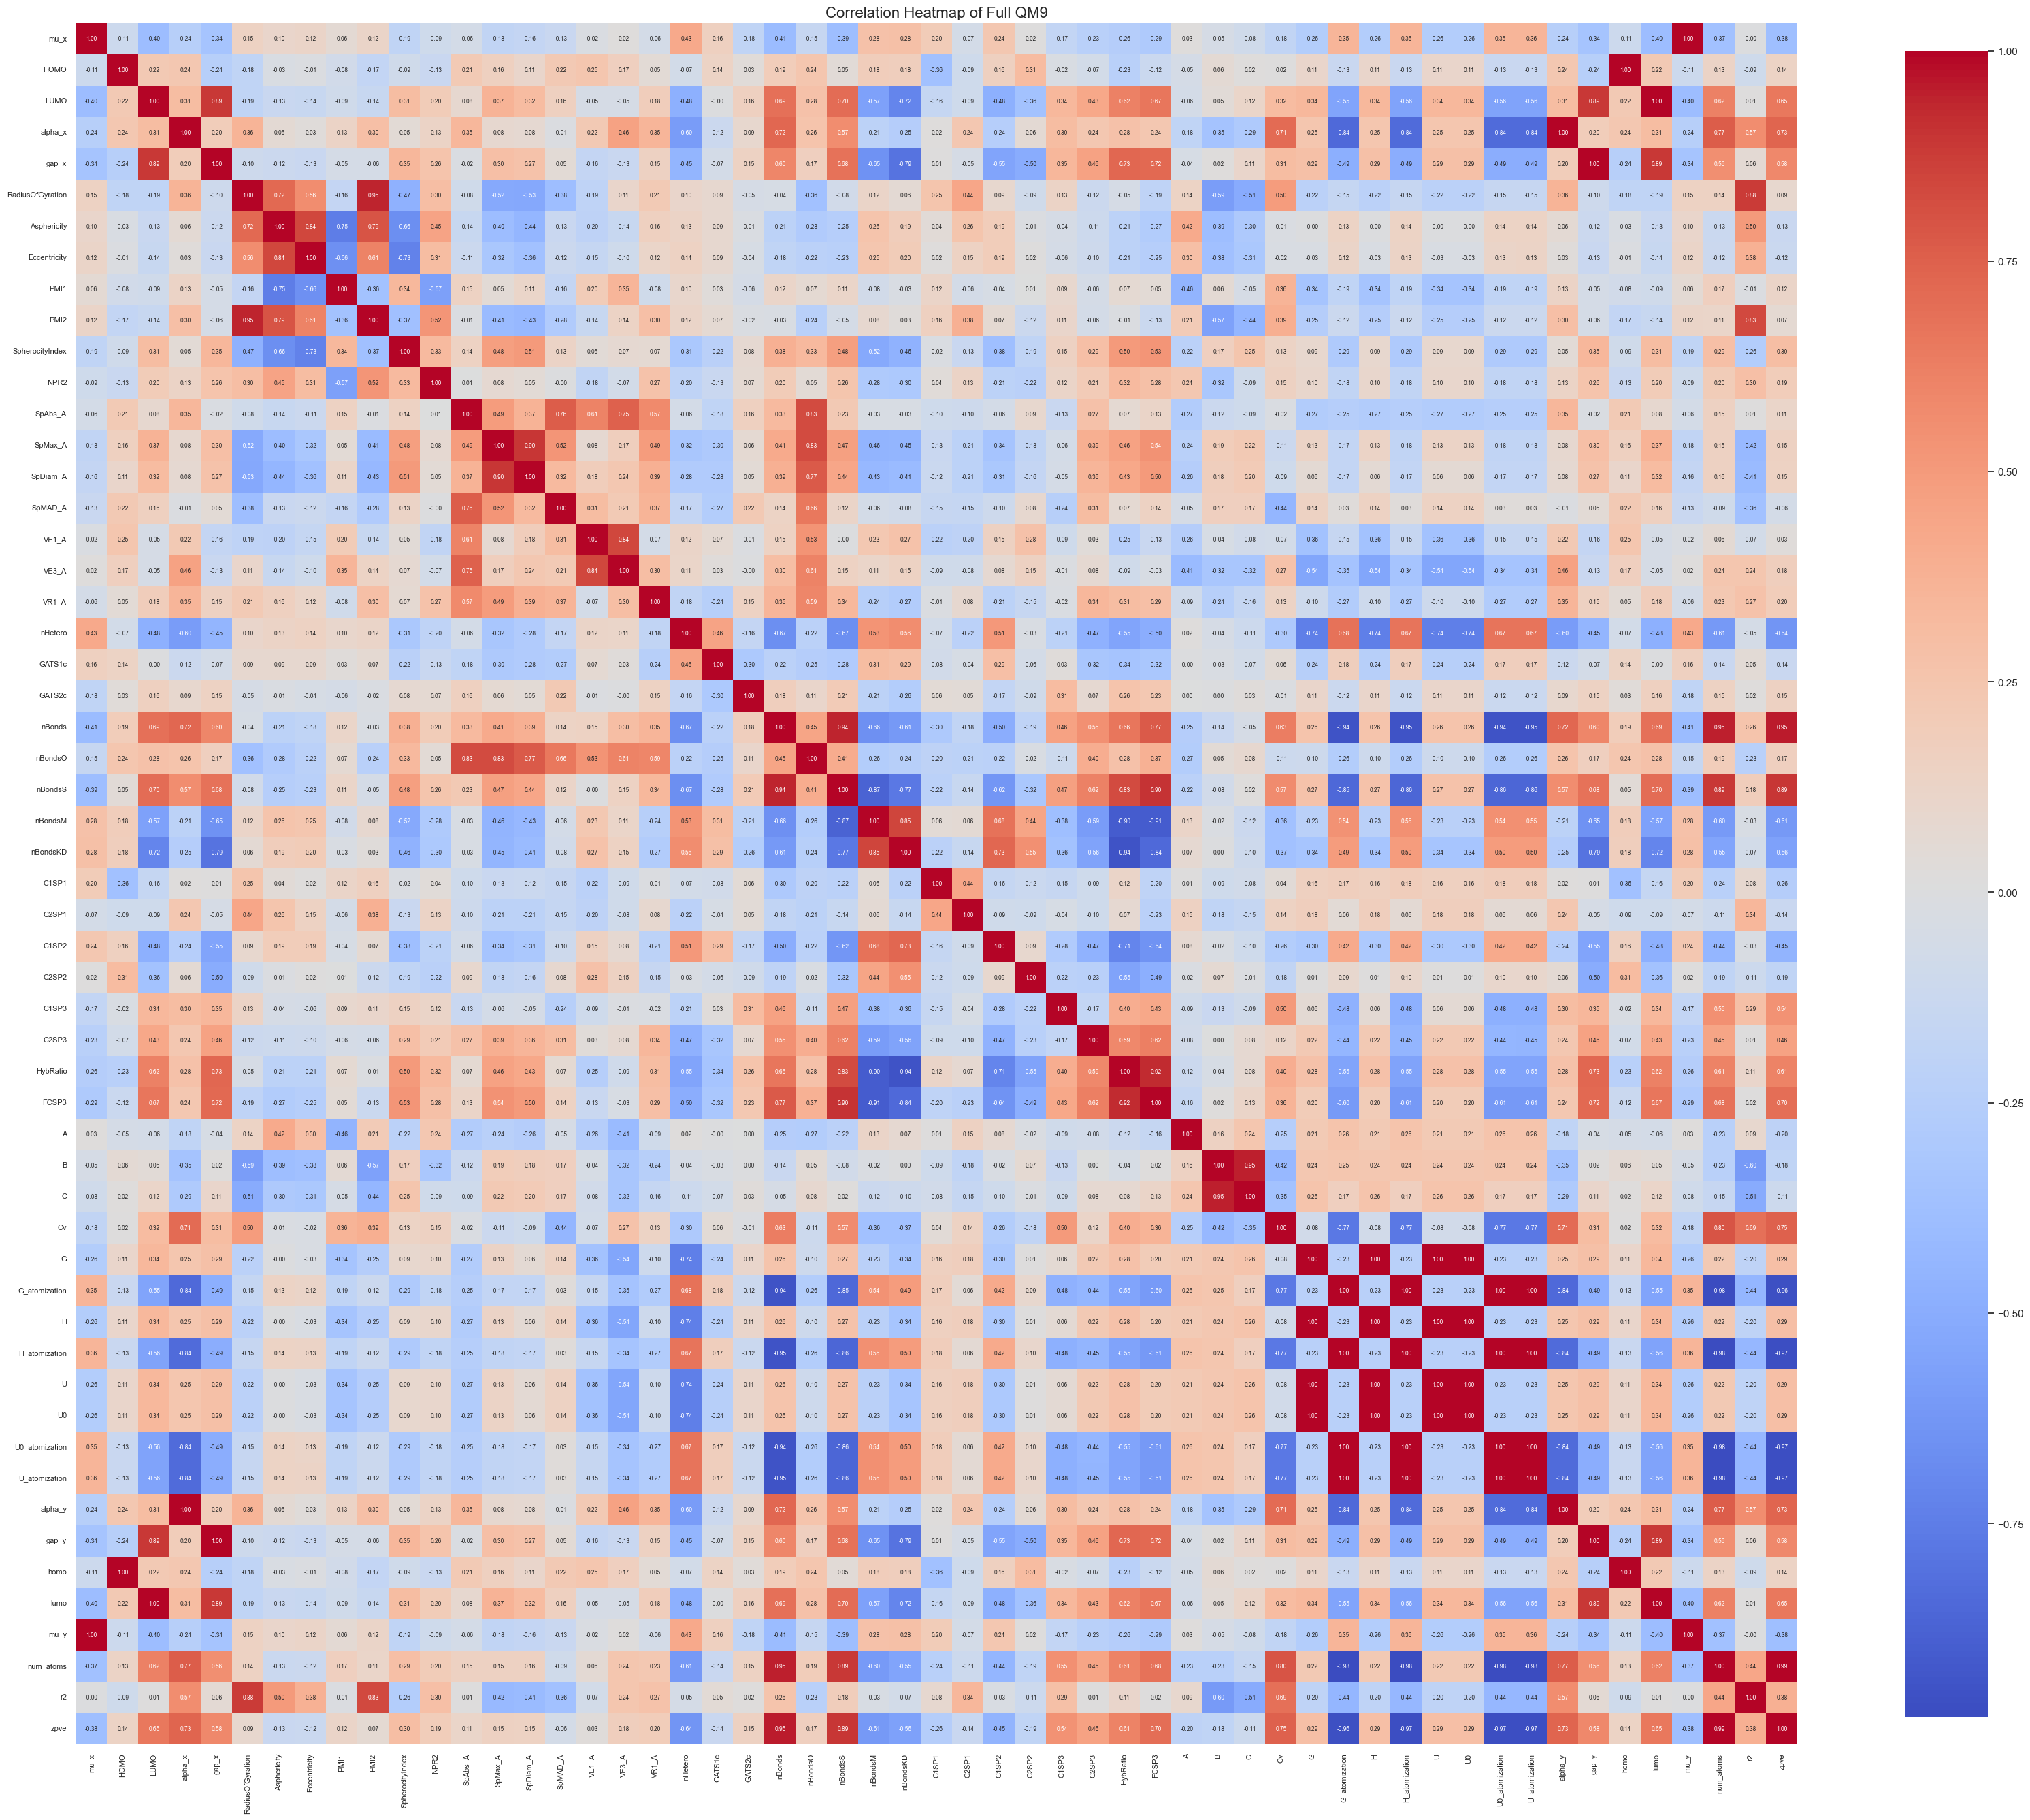

In [63]:
plot_qm9_heatmap(df_merged, title="Correlation Heatmap of Full QM9")